# Individual Coding Exercise (ICE) 3 for HUDK4051: Learning Analytics

In this ICE 3, the following aspects of Knowledge Inference is covered:
- identify common knowledge inference (e.g. IRT) packages
- fit a basic knowledge inference model to some student interaction data (e.g. BTK)

Knowledge Inference focuses on measuring what a student knows given some observations. 

In [1]:
#import all required packages

import numpy as np
import pandas as pd
from pyBKT.models import Model
import matplotlib.pyplot as plt


Bad key text.latex.unicode in file C:\Users\pooja\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\pooja\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\pooja\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/m

### Basic Model Creation and Evaluation

Initialize the model with an optional seed and number of fit initializations. Note that the Model constructor supports many more parameters such as the model variant (which can be modified at fit time), whether to parallelize computation, and more.

In [2]:
model = Model(seed = 42, num_fits = 1)
#seed is chosen to consistently replicate results and avoid randomness

In [3]:
#fetch Assistments and CognitiveTutor data to the local disk.

model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/as.csv', '.')
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/ct.csv', '.')

Open the given datasets and explore them before using them to fit BKT models using pyBKT. The column names describing the student ID, the problem name, the response's correctness and skill name all differ between the two datasets.

In [4]:
ct_df = pd.read_csv('ct.csv', encoding = 'latin')
print(ct_df.columns)
ct_df.head(5)

Index(['Unnamed: 0', 'Row', 'Anon Student Id', 'Problem Hierarchy',
       'Problem Name', 'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')


,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1576,1927,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity1,2006-11-14 10:18:00.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,5.00000,5.00000,nan,1,0,0,1,Calculate unit rate,1
1,1580,1931,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity2,2006-11-14 10:18:11.0,2006-11-14 10:18:17.0,2006-11-14 10:18:34.0,2006-11-14 10:18:34.0,23.00000,nan,23.00000,0,1,0,1,Calculate unit rate,2
2,1596,1947,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity1,2006-11-14 10:50:52.0,2006-11-14 10:50:57.0,2006-11-14 10:51:11.0,2006-11-14 10:51:11.0,18.00000,nan,18.00000,0,1,0,1,Calculate unit rate,3
3,1597,1948,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity2,2006-11-14 10:51:11.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,3.00000,3.00000,nan,1,0,0,1,Calculate unit rate,4
4,1612,1963,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-054,1,SimplifiedNumeratorQuantity2,2006-11-28 09:53:43.0,2006-11-28 09:53:47.0,2006-11-28 09:53:56.0,2006-11-28 09:53:56.0,13.00000,nan,13.00000,0,1,0,1,Calculate unit rate,5


We will fit a BKT model to every skill in the Cognitive Tutor dataset separately. When skill(s) are not specified, it trains a separate model on all skills by default.

In [5]:
as_df = pd.read_csv('as.csv', encoding = 'latin', low_memory = False)
print(as_df.columns)
as_df.head(5)

Index(['order_id', 'assignment_id', 'user_id', 'assistment_id', 'problem_id',
       'original', 'correct', 'attempt_count', 'ms_first_response',
       'tutor_mode', 'answer_type', 'sequence_id', 'student_class_id',
       'position', 'type', 'base_sequence_id', 'skill_id', 'skill_name',
       'teacher_id', 'school_id', 'hint_count', 'hint_total', 'overlap_time',
       'template_id', 'answer_id', 'answer_text', 'first_action',
       'bottom_hint', 'opportunity', 'opportunity_original'],
      dtype='object')


,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32454,tutor,...,0,3,32454,30799,nan,26,0,nan,1,1.00000
1,33022709,277618,64525,33150,51435,1,1,1,4922,tutor,...,0,3,4922,30799,nan,55,0,nan,2,2.00000
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,...,0,3,42000,30799,nan,88,0,nan,1,1.00000
3,35450295,220674,70363,33110,51395,1,1,1,4859,tutor,...,0,3,4859,30059,nan,41,0,nan,2,2.00000
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,...,3,4,124564,30060,nan,65,0,0.00000,3,3.00000


In [6]:
#evaluate with the default RMSE then specify AUC
model.fit(data_path = 'ct.csv')

In [7]:
#train multiple skills specified by a list of all skill names
model.fit(data_path = 'ct.csv', skills = ".*fraction.*")
print("Fitted Skills:\n%s" % '\n'.join(model.coef_.keys()))

Fitted Skills:
Plot non-terminating improper fraction
Plot terminating proper fraction
Calculate part in proportion with fractions
Calculate total in proportion with fractions


In [8]:
#evaluate with the default RMSE then specify AUC
model.fit(data_path = 'ct.csv')
training_rmse = model.evaluate(data = ct_df)
training_auc = model.evaluate(data_path = 'ct.csv', metric = 'auc')
print("Training RMSE: %f" % training_rmse)
print("Training AUC: %f" % training_auc)

Training RMSE: 0.454334
Training AUC: 0.706829


In [9]:
#define our own metric
def mae(true_vals, pred_vals):
    """ Calculates the mean absolute error. """
    return np.mean(np.abs(true_vals - pred_vals))

training_mae = model.evaluate(data_path = 'ct.csv', metric = mae)
print("Training MAE: %f" % training_mae)

Training MAE: 0.413380


### Model Prediction

pyBKT can return predictions on a test set given a Pandas DataFrame or a file conaining test data. If pyBKT is asked for predictions on skills for which it has not trained a model, it will output a best effort guess of 0.5 for both the correct and state predictions. We will be using the training dataset again for testing purposes.

In [10]:
model.fit(data_path = 'ct.csv', skills = ".*fraction.*")
preds = model.predict(data_path = 'ct.csv')
preds[['Anon Student Id', 'KC(Default)', 'Correct First Attempt', 
       'correct_predictions', 'state_predictions']].head(5)

,Anon Student Id,KC(Default),Correct First Attempt,correct_predictions,state_predictions
773,0I891Gg,Plot non-terminating improper fraction,0,0.50076,0.73791
774,0I891Gg,Plot imperfect radical,0,0.50000,0.50000
775,0I891Gg,Plot terminating proper fraction,0,0.51993,0.54657
776,0I891Gg,Plot pi,1,0.50000,0.50000
777,0I891Gg,Plot terminating proper fraction,1,0.46134,0.38078


In [11]:
preds[preds['correct_predictions'] != 0.5]['KC(Default)'].unique()

array(['Plot non-terminating improper fraction',
       'Plot terminating proper fraction',
       'Calculate part in proportion with fractions',
       'Calculate total in proportion with fractions'], dtype=object)

In [12]:
# Let's manually calculate the RMSE of the correct predictions 
# and ensure that it is the same as a call to the evaluate function.
def rmse(y_true, y_pred):
  """ Returns the root-mean squared error. """
  return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Filter out the data for which we did not train!
preds_filtered = preds[preds['KC(Default)'].str.contains('fraction')]
manual_training_rmse = rmse(preds_filtered['Correct First Attempt'],
                            preds_filtered['correct_predictions'])
manual_training_rmse

0.4405964248860228

In [13]:
model.evaluate(data = ct_df)

0.44059642488603024

### Model Cross-Validation and Variants

Crossvalidation is offered as a blackbox function similar to a combination of fit and evaluate that accepts a particular number of folds, a seed, and a metric (either one of the 3 provided that are 'rmse', 'auc' or 'accuracy' or a custom Python function taking 2 arguments). Similar arguments for the model types, data path/data, and skill names are accepted as with the fit function.

In [14]:
model.crossvalidate(data_path = 'ct.csv', folds = 5)

,rmse
skill,
Plot non-terminating improper fraction,0.48303
Plot imperfect radical,0.43744
Plot terminating proper fraction,0.49787
Plot pi,0.46944
Plot whole number,0.29057
Plot decimal - thousandths,0.47776
Calculate unit rate,0.48256
Calculate part in proportion with fractions,0.42763
Calculate total in proportion with fractions,0.42421


In [15]:
skill = 'Calculations with Similar Figures'
metric = 'auc'

simple_cv = model.crossvalidate(data = as_df, skills = skill, 
                                metric = metric)
simple_cv

,auc
skill,
Calculations with Similar Figures,0.59803


In [16]:
#the multigs model fits a different guess/slip rate for each class. Note that by default, for the CognitiveTutor data, the guess and slip classes will be specified by the template_id.
multigs_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                 multigs = True, metric = metric)
multigs_cv

,auc
skill,
Calculations with Similar Figures,0.67557


In [17]:
#the multilearn model fits a different learn rate (and forget rate if enabled) rate for each class specified.
#the learn classes are specified by the template_id column by default for the Assistments dataset.
multilearn_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                    multilearn = True, forgets = True, 
                                    metric = metric)
multilearn_cv

,auc
skill,
Calculations with Similar Figures,0.65257


In [18]:
#the multilearn model fits a different learn (and forget if enabled) rate for each class, and the multipair model generates a different learn rate based on each consecutive pair of classes.
#the multiprior model generates different priors based on the first response of each student.
multiprior_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                    multiprior = True, metric = metric,
                                    folds = 3)
multipair_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                   multipair = True, metric = metric,
                                   folds = 3)
pd.concat([multiprior_cv, multipair_cv], axis = 0)

,auc
skill,
Calculations with Similar Figures,0.59720
Calculations with Similar Figures,0.56925


In [19]:
#combine the fifth parameter, forgets, with the previous multilearn and multiguess/slip models for a combo model.
combo_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                               forgets = True, multilearn = True, 
                               multigs = True, metric = metric)
combo_cv

,auc
skill,
Calculations with Similar Figures,0.69883


### Model Parameter Initialization and Visualization

We can initialize any of the model parameters for a particular skill's BKT model before training using model.coef_. Similar to SciKit Learn, model.coef_ is a way to initialize model parameters and view them after they are fitted.

In [20]:
#initialize the prior parameter to 1e-3 for the Box and Whisker skill.
#if we are training a KT-IDEM (multiguess/slip) model, we need to have len(guesses) == len(slips) == # of G/S classes.
#for multilearn models, we need len(forgets) == len(guesses) corresponding to the number of learn classes.
skill = 'Box and Whisker'

model.coef_ = {skill: {'prior': 1e-40}}
model.coef_

{'Box and Whisker': {'prior': 1e-40}}

In [21]:
#train the model with the pre-initialized parameters
model.fit(data_path = 'as.csv', skills = skill, multigs = True)
low_prior_auc = model.evaluate(data_path = 'as.csv', metric = 'auc')

#we can obtain the prior value by indexing into the model.coef_ dictionary with the skill and parameter names
print("Fitted prior value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % low_prior_auc)

Fitted prior value: 0.000000
Training AUC: 0.674889


In [22]:
#initialize the prior to be more reasonable.
model.coef_ = {skill: {'prior': 0.5}}
model.fit(data_path = 'as.csv', skills = skill, multigs = True)
normal_prior_auc = model.evaluate(data_path = 'as.csv', metric = 'auc')

#print the fitted prior value and RMSE.
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % normal_prior_auc)

Fitted Prior Value: 0.717875
Training AUC: 0.698838


In [23]:
model.fit(data_path = 'as.csv', skills = skill,
         forgets = True, multilearn = True,
         multigs = True)
model.params()

value
skill           param   class          
Box and Whisker prior   default 0.64583
                learns  30059   0.34350
                        30060   0.09827
                        30799   0.36303
                        63446   0.00163
                        63447   0.21597
                        63448   0.15278
                guesses 30059   0.40358
                        30060   0.52733
                        30799   0.01392
                        63446   0.50520
                        63447   0.00000
                        63448   0.54151
                slips   30059   0.06734
                        30060   0.27638
                        30799   0.06534
                        63446   0.17904
                        63447   0.12836
                        63448   0.14282
                forgets 30059   0.00001
                        30060   0.03647
                        30799   0.00725
                        63446   0.02180
                        63447   0.05503
                        63448   0.00000

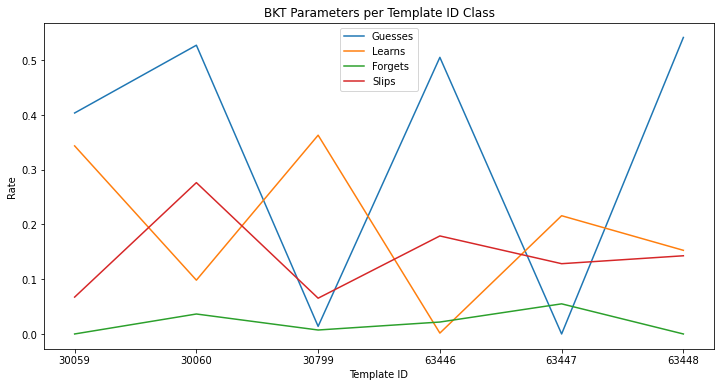

In [24]:
import warnings
warnings.simplefilter(action='ignore')


#plot the learns, forgets, slips and guesses for each of the classes.
params = model.params()
plt.figure(figsize = (12, 6))
plt.plot(params.loc[(skill, 'guesses')], label = 'Guesses')
plt.plot(params.loc[(skill, 'learns')], label = 'Learns')
plt.plot(params.loc[(skill, 'forgets')], label = 'Forgets')
plt.plot(params.loc[(skill, 'slips')], label = 'Slips')
plt.xlabel('Template ID')
plt.ylabel('Rate')
plt.title('BKT Parameters per Template ID Class')
plt.legend();

### Extended Data and Model Configuration

Models can get excessively long, whether it's due to the number of model variants used, the number of folds/seed/metric for crossvalidation, data path length, etc. We can create a configuration dictionary that describes all the parameters we will pass in.

In [25]:
config = {'multigs': True,
          'multilearn': True,
          'skills': ['Box and Whisker', 'Circle Graph'],
          'forgets': True,
          'metric': 'accuracy',
          'folds': 4,
          'seed': 42 * 42}
model.crossvalidate(data_path = 'as.csv', **config)

,accuracy
skill,
Circle Graph,0.68501
Box and Whisker,0.76170


For other non-Assistments/CogTutor style datasets, we will need to specify the columns corresponding to each required column (i.e. the user ID, correct/incorrect) because pyBKT only supports the automatic inference of column names for the AS/CT datasets. For that, we use a defaults dictionary or specify parameters for each model variant.

In [26]:
#this means that the order_id specified by the column named custom_order in our custom dataset, the skill_name is specified by the custom_skill column in our custom dataset, and so on.
defaults = {'order_id': 'custom_order', 
            'skill_name': 'custom_skill', 
            'correct': 'custom_answer'}

#this defaults dictionary can also contain columns specifying what columns correspond to the desired guess/slip classes, etc.
defaults['multigs'] = 'custom_gs_classes'

#our final column mapping is:
defaults

{'order_id': 'custom_order',
 'skill_name': 'custom_skill',
 'correct': 'custom_answer',
 'multigs': 'custom_gs_classes'}

In [27]:
#we'll use this mapping with the modified CogTutor dataset with the names we chose for the columns.
#Row is the order ID (order_id), KC(Default) is the skill name (skill_name), Correct First Attempt is correct, and Problem Name is the corresponding guess/slip class column.

columns = ['Row', 'Anon Student Id', 'KC(Default)', 
           'Correct First Attempt', 'Problem Name']
my_df = ct_df[columns]
my_df.columns = ['custom_order', 'Anon Student Id',
                 'custom_skill', 'custom_answer',
                 'custom_gs_classes']
my_df['custom_skill'] += ' (Custom)'
my_df.head(5)

,custom_order,Anon Student Id,custom_skill,custom_answer,custom_gs_classes
773,112149,0I891Gg,Plot non-terminating improper fraction (Custom),0,RATIONAL1-014
774,112151,0I891Gg,Plot imperfect radical (Custom),0,RATIONAL1-041
775,112156,0I891Gg,Plot terminating proper fraction (Custom),0,RATIONAL1-104
776,112157,0I891Gg,Plot pi (Custom),1,RATIONAL1-122
777,112159,0I891Gg,Plot terminating proper fraction (Custom),1,RATIONAL1-180


In [28]:
#we can crossvalidate/fit given these default column mappings.
model.crossvalidate(data = my_df, metric = 'auc',
                    defaults = defaults)

,auc
skill,
Plot non-terminating improper fraction (Custom),0.65161
Plot imperfect radical (Custom),0.63955
Plot terminating proper fraction (Custom),0.57202
Plot pi (Custom),0.61355
Plot whole number (Custom),0.52139
Plot decimal - thousandths (Custom),0.62892
Calculate unit rate (Custom),0.60171
Calculate part in proportion with fractions (Custom),0.67762
Calculate total in proportion with fractions (Custom),0.70634


### Sample Case Studies

In [29]:
# Question 1: Which model variant has the smallest training loss for "Venn Diagram" in as.csv?
models = {}

model = Model(seed = 42, num_fits = 1)
model.fit(data_path="as.csv", skills="Venn Diagram")
models['simple'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", multilearn=True)
models['multilearn'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", multigs=True)
models['multigs'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", forgets=True)
models['forgets'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", forgets=True, 
          multigs = True)
models['multigs + forgets'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", forgets=True,
          multilearn = True)
models['multilearn + forgets'] = model.evaluate(data_path="as.csv")

df = pd.DataFrame(models.items())
df.columns = ['model type', 'RMSE']
df.set_index('model type')

,RMSE
model type,
simple,0.32943
multilearn,0.32643
multigs,0.29912
forgets,0.27885
multigs + forgets,0.26625
multilearn + forgets,0.26793


In [30]:
# Question 2: Which columns work the best for the multilearn skills below in ct.csv?

skills = ['Calculate unit rate',
          'Calculate part in proportion with fractions']
column_names = ["Anon Student Id", "Problem Hierarchy", "Problem Name", 
                "Problem View", "Step Name", "Correct First Attempt", 
                "Incorrects", "Hints", "Opportunity(Default)"]
model = Model(num_fits = 1)
for skill in skills:
  print("------------------")
  print("SKILL: %s" % skill)
  print("Basic:", model.crossvalidate(data_path="ct.csv", 
                                    skills=skill,
                                    metric = 'auc').iloc[0, 0])
  for i in column_names:
    print("%s:" % i, model.crossvalidate(data_path="ct.csv", 
                                              skills=skill, 
                                              multilearn=i,
                                              metric = 'auc').iloc[0, 0])

------------------
SKILL: Calculate unit rate
Basic: 0.6017036588346203
Anon Student Id: 0.4371056323937427
Problem Hierarchy: 0.6017098407053296
Problem Name: 0.5803379998637883
Problem View: 0.6010506965162591
Step Name: 0.5940362635608647
Correct First Attempt: 0.596866906972131
Incorrects: 0.6071413278178038
Hints: 0.6109876753610872
Opportunity(Default): 0.6053425079750087
------------------
SKILL: Calculate part in proportion with fractions
Basic: 0.6774758485678991
Anon Student Id: 0.5088273430317144
Problem Hierarchy: 0.6777830953724282
Problem Name: 0.6374637677099639
Problem View: 0.6714095666925581
Step Name: 0.6778675784059662
Correct First Attempt: 0.6776940898621933
Incorrects: 0.6754885625660141
Hints: 0.6785942849694827
Opportunity(Default): 0.6834884427037139
